**Attributes Description**
1. sex: Male or Female
2. age: rounded up to 5 years
3. height: rouded up to 5 cm
4. weight: in kg
5. waistline: in cm
6. sight_left: left eyesight power; 0.1 is bad, 1.0 is avg, 2.0 is perfect
7. sight_right: right eyesight power; 0.1 is bad, 1.0 is avg, 2.0 is perfect
8. hear_left: left hearing; 1 is normal, 2 is abnormal
9. hear_right: right hearing; 1 is normal, 2 is abnormal
10. SBP (Systolic Blood Pressure): It represents the pressure in the arteries when the heart beats.
11. DBP (Diastolic Blood Pressure): Indicating the pressure in the arteries when the heart is at rest between beats.
12. BLDS: Blood Sugar level
13. tot_chole (Total Cholesterol): a measurement of the total amount of cholesterol in the blood. usually measured in milligrams per deciliter (mg/dL).
14. HDL_chole (High-Density Lipoprotein Cholesterol): is a type of cholesterol often referred to as "good" cholesterol. It's measured in mg/dL and is associated with lower risk of heart disease.
15. LDL_chole (Low-Density Lipoprotein Cholesterol): LDL cholesterol is the "bad" cholesterol and is associated with a higher risk of heart disease. It's also measured in mg/dL.
16. triglyceride: Triglycerides are a type of fat found in the blood.
17. hemoglobin: Hemoglobin is a protein in red blood cells that carries oxygen.
18. urine_protein:
19. serum_creatinine: a blood test used to measure kidney function.
20. SGOT_AST : Aspartate Aminotransferase
21. SGOT_ALT (Alanine Aminotransferase): liver enzyme.
22. gamma_GTP: Gamma-glutamyl transpeptidase is an enzyme found in the liver.

23. SMK_stat_type_cd: smoking state, 1 never, 2 used to but stopped, 3 still smokes
24. DRK_YN: drinking y/n

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
sns.set_palette('plasma', n_colors=None, desat=None, color_codes=False)
pc = ['#FFB6C1', '#FFA07A', '#FFD700', '#98FB98', '#DDA0DD', '#87CEEB', '#F0E68C', '#FFE4E1', '#98FB98', '#FF69B4']



In [3]:
df = pd.read_parquet("smoking_driking_dataset_Ver01.parquet")

In [4]:
df.shape

(991346, 24)

In [5]:
def print_file_size(file_path):
    file_stats = os.stat(file_path)
    file_size = np.round(file_stats.st_size / (1024 * 1024), 3)
    return file_size

In [6]:
print_file_size("smoking_driking_dataset_Ver01.parquet") #In MB

17.091

In [7]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [8]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

**Separate the categorical_columns and numerical_columns**

In [10]:
categorical_columns = [feature for feature in df.columns if df[feature].dtypes =='O']
categorical_columns

['sex', 'DRK_YN']

In [11]:
numerical_columns=[feature for feature in df.columns if df[feature].dtypes !='O']
numerical_columns

['age',
 'height',
 'weight',
 'waistline',
 'sight_left',
 'sight_right',
 'hear_left',
 'hear_right',
 'SBP',
 'DBP',
 'BLDS',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'hemoglobin',
 'urine_protein',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP',
 'SMK_stat_type_cd']

**Is there any null value?**

In [12]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

**Let us see the statistical analysis of numaric attributes**

In [13]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


The 'waistline' attribute has a mean value of 81, but max value is 999 which is very large compare to mean. So there might be outliers in this attribute.

**Now let as map sex and DRK_YN to numaric value so that we can analyze this attributes in heatmap**

In [14]:
#do not make any changes to the original dataset, so create a copy
df_new = df.copy()

df_new['sex'] = df_new['sex'].map({'Male':1,'Female':2})
df_new['DRK_YN'] = df_new['DRK_YN']. map({'Y':1,'N':0})


<Axes: >

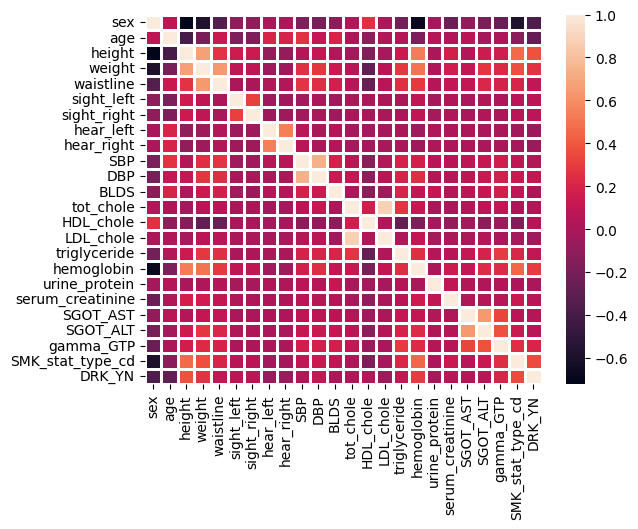

In [15]:
sns.heatmap(data=df_new.corr(), lw = 1)

<Axes: xlabel='sex', ylabel='count'>

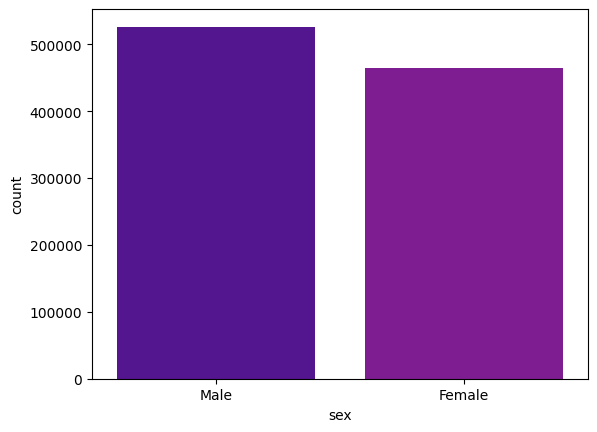

In [16]:
sns.countplot(data=df, x="sex")

<Axes: xlabel='DRK_YN', ylabel='count'>

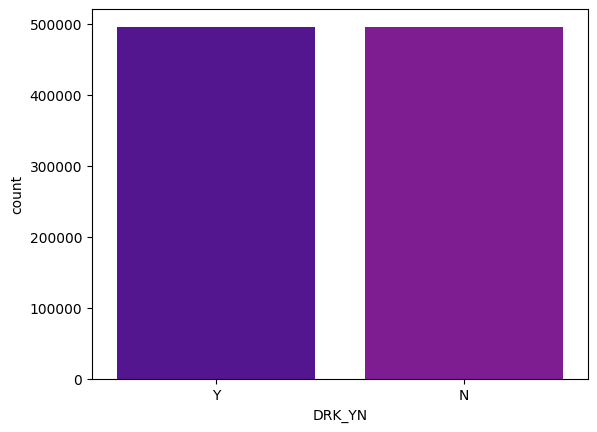

In [17]:
sns.countplot(data=df, x="DRK_YN")

**Box Plot**

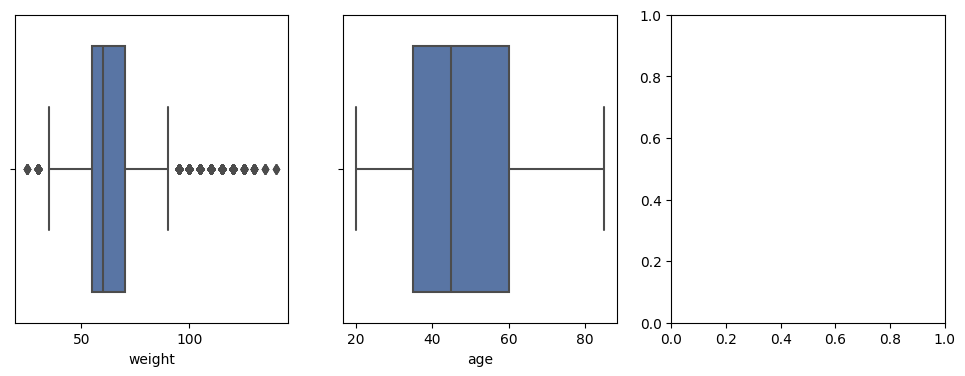

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["weight", "age"]):
    sns.boxplot(x=df[col], ax=ax[axid])

In [19]:
df_new.shape

(991346, 24)

<Axes: xlabel='SMK_stat_type_cd', ylabel='count'>

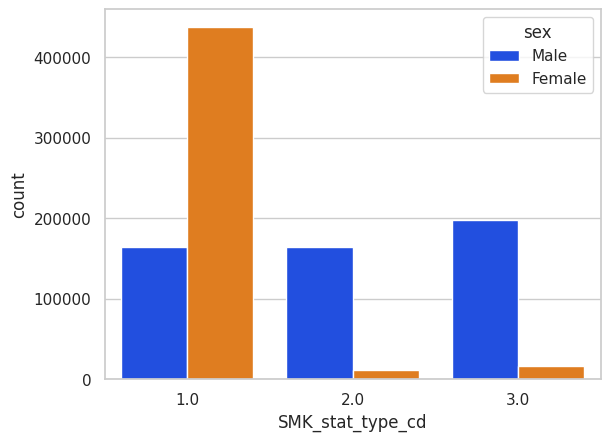

In [20]:
sns.countplot(data = df, x='SMK_stat_type_cd',hue='sex',palette='bright')


SMK_stat_type_cd is a smoking state, 1 never, 2 used to but stopped, 3 still smokes.

The females are significantly higher among non-smokers, whereas among smokers, males show a relatively higher prevalence.

<Axes: xlabel='DRK_YN', ylabel='count'>

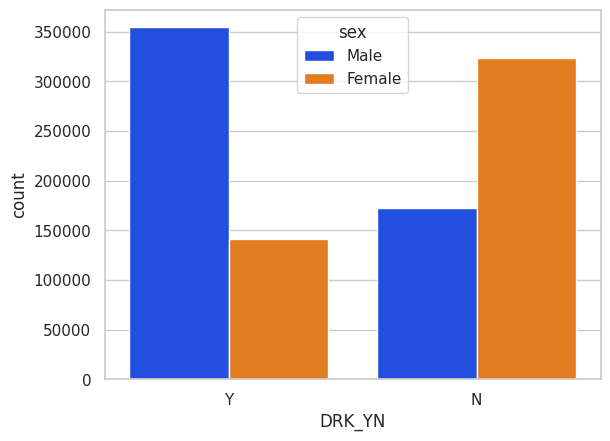

In [24]:
sns.countplot(data = df, x='DRK_YN',hue='sex',palette='bright')

same observation...

<Axes: xlabel='DRK_YN', ylabel='count'>

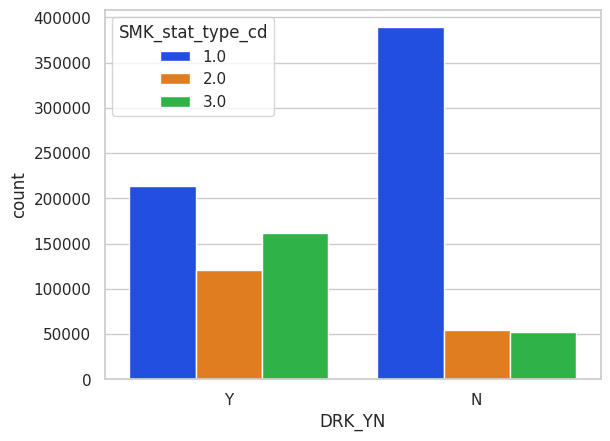

In [22]:
sns.countplot(data = df, x='DRK_YN',hue='SMK_stat_type_cd',palette='bright')